# **Pertemuan 6 - Independent Probability**

Introduction to Probability Course - Sekolah Data - Pacmann Academy

# Peluang Independen

Dari materi yang sudah dipelajari di video:
* Event/kejadian independen merupakan sebuah konsep.
* Dimana kejadian satu dan kejadian lainnya tidak saling mempengaruhi satu sama lain.

Misal, pada pelemparan 2 koin. Kemungkinan koin pertama untuk mendapat "angka" tidak mempengaruhi peluang koin kedua.

<center><img src="../assets/coin_toss_twice_tree.jpg" alt="Drawing" height=250/></center>

---
## Coin Toss

Untuk mendapatkan "sense" dari kejadian independen ini kita akan coba simulasikan kejadiannya. 

In [2]:
import sys
sys.path.insert(0, "/home/ubuntu/learning/probability-and-random-variables/")

import probs_module.module_python_ind_probs_6 as module

Dengan menggunakan modul yang sudah disediakan kita dapat melakukan perhitungan peluang. Pertama, kita akan coba gunakan modul tersebut untuk membuat distribusi ruang sampel dengan menggunakan fungsi `Dist` di dalam modul:

In [3]:
module.Dist(['TT','HT','TH','HH','HT'])

Dist({'HT': 2, 'TT': 1, 'TH': 1, 'HH': 1})

Sehingga, misal diberikan sebuah kasus sederhana:

In [4]:
space = module.Dist([1,2,3,4,4,3,3,2,2,2,1,5,5,6,5,3,6,1,2,6])
event = {2}

Pada kode diatas, kita membuat:
* ruang sampel dengan nama `space`
* sebuah event, yaitu keluar angka 2

Sehingga, untuk menghitung peluang kita dapat menggunakan fungsi `peluang`

In [5]:
module.Peluang(event,space)

0.25

* Sekarang, coba kita simulasikan pelemparan 1 koin dahulu.
* Koin ini dilempar sebanyak sepuluh kali, dan kita lihat hasilnya.

In [6]:
module.lempar_satu_koin(10)

Head Probability: 0.4 
 Tail Probability: 0.6
Hasil pelemparan koin 10 kali = Dist({'T': 6, 'H': 4})


Sekarang, kita coba besarkan jumlah simulasinya

In [7]:
module.lempar_satu_koin(100)

Head Probability: 0.64 
 Tail Probability: 0.36
Hasil pelemparan koin 100 kali = Dist({'H': 64, 'T': 36})


In [8]:
module.lempar_satu_koin(1000000)

Head Probability: 0.499477 
 Tail Probability: 0.500523
Hasil pelemparan koin 1000000 kali = Dist({'T': 500523, 'H': 499477})


Mengapa kita coba lakukan satu juta kali pelemparan? Coba kita simulasikan lagi.

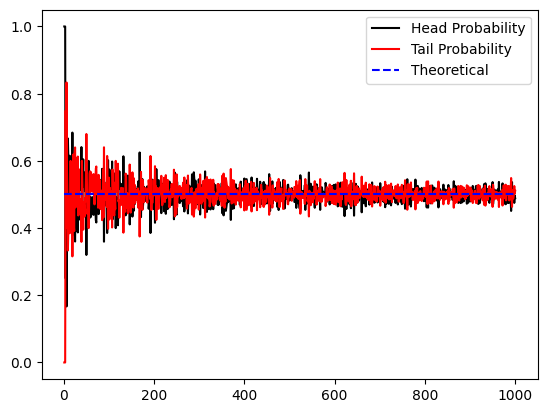

In [9]:
module.eksperimen_lempar(1000, 1)

Kita bisa melihat bahwa nilai keduanya sangat dekat dengan nilai peluang secara teori yaitu $0.5$.

<center><img src="../assets/coin_toss_tree.jpg" alt="Drawing" height=200/></center>

Lalu, jika keduanya independen. Menurut teori yang sudah dibahas di kelas:

$$P(A \cap B) = P(A) \cdot P(B)$$

Jika:
- A adalah peluang koin pertama untuk dapat `Head`
- B adalah peluang koin kedua untuk dapat `Head`

Maka:

$$P(A \cap B) = 0.5 \cdot 0.5 = 0.25$$

<center><img src="../assets/coin_toss_twice_tree.jpg" alt="Drawing" height=250/></center>

Sekarang, akan kita coba simulasikan pelemparan sebanyak satu juta kali 

In [10]:
two_coins_tosses = module.lempar_koin(n_sim = 1000000, n_coins = 2)

Kita lihat nilai peluangnya

In [11]:
p_double_head = module.Peluang({'HH'}, two_coins_tosses)

print(f"Two Heads Probability: {p_double_head}")

Two Heads Probability: 0.250007


---
## Disjoint Event

Kejadian disjoint merupakan kejadian berjumlah lebih dari satu dan masing-masing kejadian tidak memiliki irisan.

<center><img src="../assets/disjoint-of-sets-using-Venn-diagram.png" alt="Drawing" height=250/></center>

Dalam sesi ini kita akan coba simulasikan apakah event yang disjoint merupakan kejadian independen atau tidak.

Misal, kita memiliki dua set:

* Set pertama, adalah kartu dengan angka kurang dari sama dengan 6
* Set kedua, adalah kartu bukan angka
* Universal Set adalah keseluruhan *rank* kartu.

In [12]:
A = {'1','2','3','4','5','6'}
B = {'J','Q','K','A'}
U = {'1','2','3','4','5','6','7','8','9','10','J','Q','K','A'}

Dalam kejadian independen. Jika dua kejadian terjadi bersamaan:

<center>$P(A \cap B) = P(A) \cdot P(B)$</center>

In [13]:
PA = module.Peluang(A,U)
PB = module.Peluang(B,U)
PAnB = PA * PB

print(f"Jika dua kejadian independen, maka Peluang A dan B terjadi bersamaan adalah: {PAnB}")

Jika dua kejadian independen, maka Peluang A dan B terjadi bersamaan adalah: 0.12244897959183672


Namun, dalam kasus ini, coba kita hitung peluang irisan dari kedua set:

In [14]:
PAnB_2 = module.Peluang((A&B), U)
print(f"Peluang sebenarnya: {PAnB_2}")

Peluang sebenarnya: 0.0


Peluang sebenarnya adalah $0$. Karena dalam **sekali penambilan kartu** tidak mungkin memiliki angka `6` dan `King` bersamaan, misalnya.

---
##Conditional Independence

Misal sebuah perusahaan memiliki 2 mesin, dan dari data historis diketahui bahwa:
* Selama 1.000 jam kerja, mesin A memiliki _downtime_ selama kurang lebih 20 jam.
<center><img src="https://www.knic.co.id/uploads/6/easy-ways-to-maintain-your-manufacturing-machines-function-well.jpg" alt="Drawing" height=200/></center>

* Selama 1.000 jam kerja, mesin B memiliki _downtime_ selama kurang lebih 25 jam.
<center><img src="../assets/factory.jpg" alt="Drawing" height=200/></center>

Distribusi ini dapat dituliskan sebagai:

In [15]:
# U for up, D for Down
machine_A = module.Dist({'U':980, 'D':20})
machine_B = module.Dist({'U':975, 'D':25})

Kita definisikan fungsi untuk mensimulasikan kerja mesin ini:

Lalu kita coba untuk simulasikan selama satu juta jam kerja:


In [16]:
machine_states = module.simulasi_mesin(1000000, machine_A, machine_B)

In [17]:
print(machine_states)

Dist({'UU': 955703, 'UD': 24402, 'DU': 19381, 'DD': 514})


Dari simulasi tersebut coba kita hitung peluang untuk **keduanya down**

In [18]:
module.Peluang({'DD'}, machine_states)

0.000514

Berdasarkan perhitungan analitik:

$$P(A \cap B) = P(A) \cdot P(B)$$
$$P(A \cap B) = \frac{20}{1000} \cdot \frac{25}{1000} = 0.0005$$

### Kasus Hujan

Misal, diketahui informasi tambahan:
* Di daerah pabrik tersebut, 25% dari waktu turun hujan. ($P(R) = 0.25$)
* Ketika turun hujan: 
    * Lama downtime mesin A menjadi 4%. ($P(A|R) = 0.04$)
    * Lama downtime mesin B menjadi 6%. ($P(B|R) = 0.06$)

Jika dikonversi menjadi **hitungan jam**, kurang lebih menjadi seperti ini:
* Selama 250 jam kerja, mesin A memiliki _downtime_ selama kurang lebih 10 jam.
* Selama 250 jam kerja, mesin B memiliki _downtime_ selama kurang lebih 15 jam.


In [19]:
# U for up, D for Down
machine_A_rain = module.Dist({'U':240, 'D':10})
machine_B_rain = module.Dist({'U':235, 'D':15})

Jika kita simulasikan, peluang bagi mesin A dan B sama-sama rusak adalah:

In [20]:
machine_states_rain = module.simulasi_mesin(1000000, machine_A_rain, machine_B_rain)

In [21]:
print(machine_states_rain)

Dist({'UU': 902517, 'UD': 57399, 'DU': 37710, 'DD': 2374})


In [22]:
module.Peluang({'DD'}, machine_states_rain)

0.002374

Secara analitik. kita tahu bahwa

$$P(A \cap B | R) = P(A|R) \cdot P(B|R)$$
$$P(A \cap B | R) = \frac{10}{250} \cdot \frac{15}{250} = 0.004$$

---
## Reliability Simulation

Misal, dalam sebuah sistem terdapat 3 komponen independen yang bekerja secara serial.

<center><img src="../assets/reliability_simulation_1.jpg" alt="Drawing" height=200/></center>

Dari komponen ini diketahui **reliabilitas** atau peluang untuk tiap komponen untuk terus bekerja adalah:
* Sensor: $P(up) = 0.998$
* Autopilot: $P(up) = 0.9975$
* Control Surfaces: $P(up) = 0.995$

Berapa peluang untuk keseluruhan sistem terus berjalan?

Jika dikonversi menjadi bentuk _count_:
- Sensor: 20 kali rusak dalam 10.000 penerbangan
- Autopilot: 25 kali rusak dalam 10.000 penerbangan
- Control Surfaces: 50 kali rusak dalam 10.000 penerbangan

In [23]:
# U for up, D for Down
sensor = module.Dist({'U':9980, 'D':20})
autopilot = module.Dist({'U':9975, 'D':25})
surface = module.Dist({'U':9950, 'D':50})

In [24]:
components = [sensor, autopilot, surface]
sys_states_1 = module.simulasi_sistem(1000000, components)

In [25]:
print(sys_states_1)

Dist({'UUU': 990620, 'UUD': 4967, 'UDU': 2450, 'DUU': 1939, 'UDD': 11, 'DUD': 8, 'DDU': 5})


In [26]:
module.Peluang({'UUU'}, sys_states_1)

0.99062

---
Sekarang, kita memiliki sebuah sistem paralel yang terdiri dari 4 mesin.

<center><img src="../assets/reliability_simulation_2.jpg" alt="Drawing" height=500/></center>

Dimana peluang tiap mesin untuk up adalah:

$P(up) = 0.99$

Berapa kemungkinan untuk keseluruhan sistem tetap hidup?

In [27]:
engine = module.Dist({'U':9900, 'D':100})

In [28]:
engines = [engine]*4
sys_states_2 = module.simulasi_sistem(1000000, engines)

In [29]:
sys_states_2

Dist({'UUUU': 960687,
      'UUDU': 9732,
      'UDUU': 9731,
      'UUUD': 9670,
      'DUUU': 9563,
      'DUDU': 111,
      'DDUU': 108,
      'UDDU': 101,
      'DUUD': 100,
      'UDUD': 98,
      'UUDD': 97,
      'DUDD': 2})

In [30]:
P_fail_all = module.Peluang({'DDDD'}, sys_states_2)

In [31]:
print(f'Peluang sistem tetap bekerja adalah {1-P_fail_all}')

Peluang sistem tetap bekerja adalah 1.0
